In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv("/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
median_reviews_per_month = df['reviews_per_month'].median()
df['reviews_per_month'].fillna(median_reviews_per_month, inplace=True)

/tmp/ipykernel_33/106539244.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(median_reviews_per_month, inplace=True)


In [12]:
object_columns = df.select_dtypes(include='object').columns
df.dropna(subset = object_columns, inplace = True)

df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [15]:
numeric_columns = df.select_dtypes(exclude='object').columns

In [16]:
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

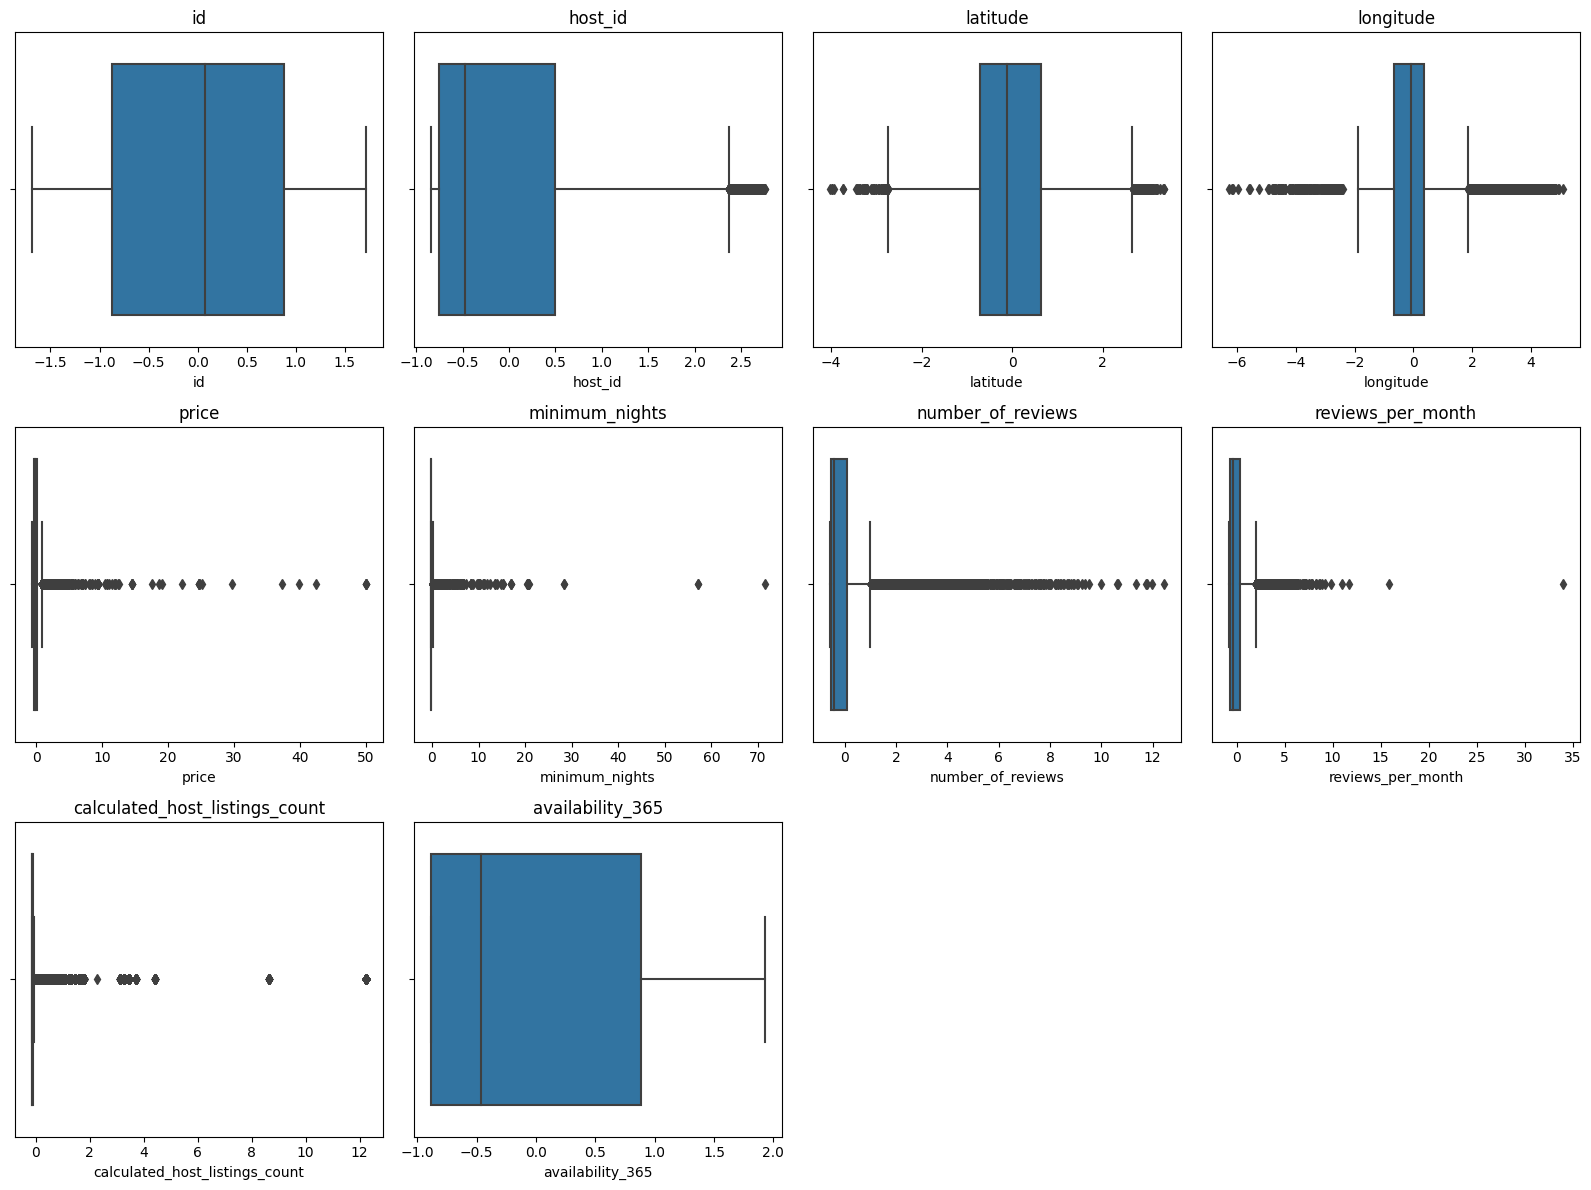

In [19]:
num_numeric_columns = len(numeric_columns)
num_rows = (num_numeric_columns + 3) // 4 
plt.figure(figsize=(16, num_rows * 4))  

for i, col in enumerate(numeric_columns):
    plt.subplot(num_rows, 4, i + 1) 
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [21]:
z_scores = np.abs(stats.zscore(df[numeric_columns]))
threshold = 3
outlier_indices = np.where(z_scores > threshold)
outlier_rows = set(outlier_indices[0])

In [23]:
df.reset_index(drop=True, inplace=True)
df.drop(outlier_rows, inplace=True)

In [24]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,-1.692442,Clean & quiet apt home by the park,-0.846455,John,Brooklyn,Kensington,-1.466432,-0.454489,Private room,0.033846,-0.280020,-0.421114,2018-10-19,-0.692272,0.031685,1.930958
1,-1.692437,Skylit Midtown Castle,-0.846455,Jennifer,Manhattan,Midtown,0.463554,-0.698641,Entire home/apt,0.419648,-0.280020,0.326048,2019-05-21,-0.591100,-0.120391,1.853755
3,-1.692210,Entire Apt: Spacious Studio/Loft by central park,-0.846397,Laura,Manhattan,East Harlem,1.279884,0.153319,Entire home/apt,-0.316421,0.237554,-0.421114,2018-11-19,-0.757736,-0.158411,-0.886959
4,-1.692202,Large Cozy 1 BR Apartment In Midtown East,-0.846396,Chris,Manhattan,Murray Hill,0.355353,-0.510815,Entire home/apt,0.292740,-0.165004,0.927929,2019-06-22,-0.466123,-0.158411,0.108962
5,-1.692200,BlissArtsSpace!,-0.846395,Garon,Brooklyn,Bedford-Stuyvesant,-0.750120,-0.103040,Private room,-0.417948,2.250344,0.409066,2017-10-05,-0.579198,-0.158411,-0.886959
